# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Import the data

In [2]:
# path to string
path = r'/Users/puchater/Documents/CareerFoundry/Data Immersion/6 Final Project/2 Data'

In [3]:
happy = pd.read_pickle(os.path.join(path, 'Prepared Data', 'happy_clean_data.pkl'))

# Creating a heat map

In [4]:
%matplotlib inline

In [5]:
# renaming columns 
happy.columns

Index(['Country', 'Year', 'Happiness score', 'GDP', 'Social support',
       'Life expectancy', 'Freedom', 'Generosity', 'Corruption',
       'Positive affect', 'Negative affect'],
      dtype='object')

In [6]:
happy.rename(columns = {'Country name' : 'Country', 'year': 'Year', 
                     'Life Ladder': 'Happiness score', 'Log GDP per capita': 'GDP',
                     'Social support': 'Social support', 'Healthy life expectancy at birth' : 'Life expectancy', 'Freedom to make life choices' : 'Freedom', 'Generosity':'Generosity',
                      'Perceptions of corruption':'Corruption', 'Positive affect':'Positive affect', 'Negative affect': 'Negative affect'},
                      inplace = True)

In [7]:
happy.dtypes

Country             object
Year                 int64
Happiness score    float64
GDP                float64
Social support     float64
Life expectancy    float64
Freedom            float64
Generosity         float64
Corruption         float64
Positive affect    float64
Negative affect    float64
dtype: object

In [8]:
happy.corr()

/var/folders/h2/_kwm8tsx60g1sw4xhnb42h500000gn/T/ipykernel_94847/3242457604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  happy.corr()


,Year,Happiness score,GDP,Social support,Life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect
Year,1.000000,0.066015,0.088595,-0.013235,0.181925,0.259436,0.010813,-0.097698,0.025603,0.218521
Happiness score,0.066015,1.000000,0.788397,0.723084,0.724413,0.530487,0.171980,-0.452090,0.511359,-0.337940
GDP,0.088595,0.788397,1.000000,0.696177,0.831118,0.355225,-0.021156,-0.350958,0.231289,-0.259608
Social support,-0.013235,0.723084,0.696177,1.000000,0.601377,0.402694,0.059556,-0.224861,0.435752,-0.451396
Life expectancy,0.181925,0.724413,0.831118,0.601377,1.000000,0.366626,0.009502,-0.305354,0.220278,-0.138502
Freedom,0.259436,0.530487,0.355225,0.402694,0.366626,1.000000,0.320490,-0.481308,0.587921,-0.271690
Generosity,0.010813,0.171980,-0.021156,0.059556,0.009502,0.320490,1.000000,-0.282718,0.321033,-0.082654
Corruption,-0.097698,-0.452090,-0.350958,-0.224861,-0.305354,-0.481308,-0.282718,1.000000,-0.293001,0.276698
Positive affect,0.025603,0.511359,0.231289,0.435752,0.220278,0.587921,0.321033,-0.293001,1.000000,-0.328518
Negative affect,0.218521,-0.337940,-0.259608,-0.451396,-0.138502,-0.271690,-0.082654,0.276698,-0.328518,1.000000


In [9]:
# Create a subset excluding the "Date" and "No" columns

sub = happy[['Happiness score', 'GDP', 'Social support','Life expectancy', 'Freedom', 'Generosity', 'Corruption']]

In [10]:
sub

,Happiness score,GDP,Social support,Life expectancy,Freedom,Generosity,Corruption
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620
...,...,...,...,...,...,...,...
2194,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209
2195,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652
2196,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523
2197,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945


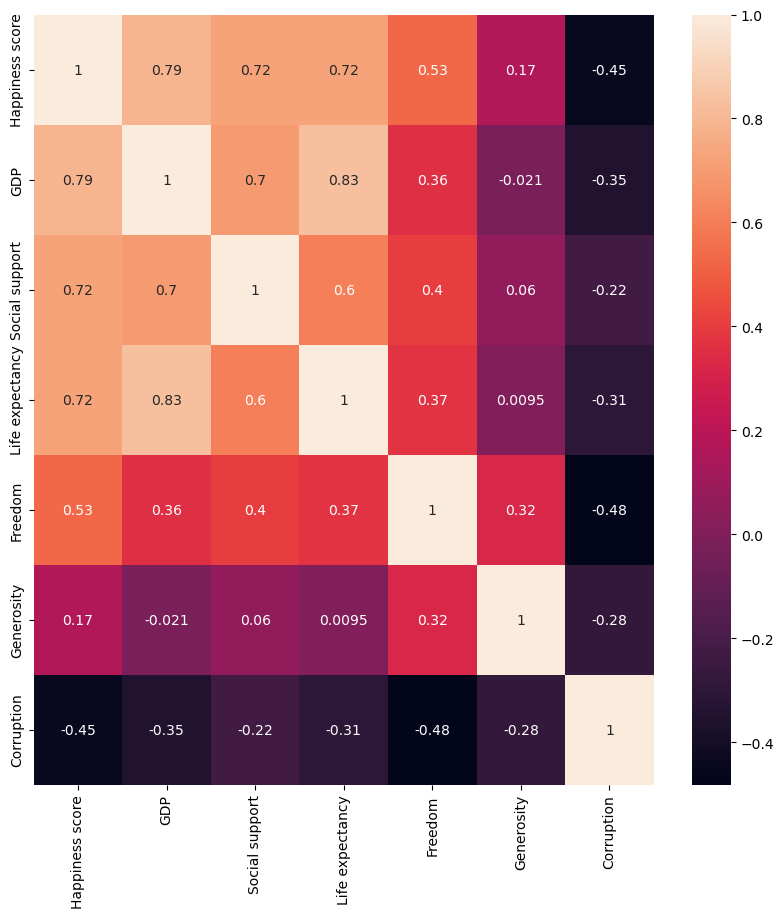

In [11]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [12]:
# The strong positive correlation with happiness score occure for GDP, Social support, Life expectancy and Freedom, which seems to be strong happiness factors.
# Moderate negative correlation occurs between happiness score and Corruption, which would point that increase corruption negatively affects happiness score.
# Finally, weak positive correlation occurs between happiness score and generosity, which may suggest weak positive effect on happiness score.
# Interestingly. Corruption shows moderate negative correlation with all factors which may suggest that it is a good indicator of crisis in a country.

# Scatter plot

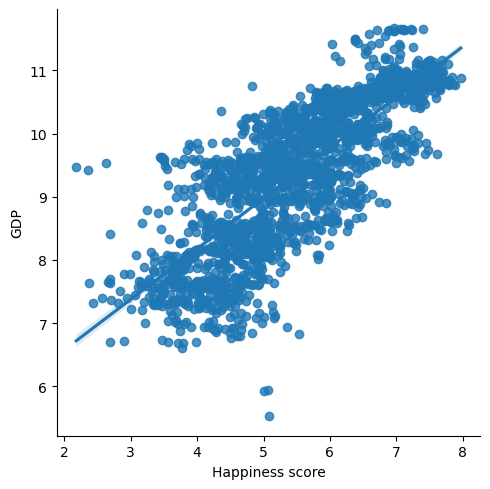

In [13]:
sns.lmplot(x = 'Happiness score', y = 'GDP', data = happy)

# Pair plots

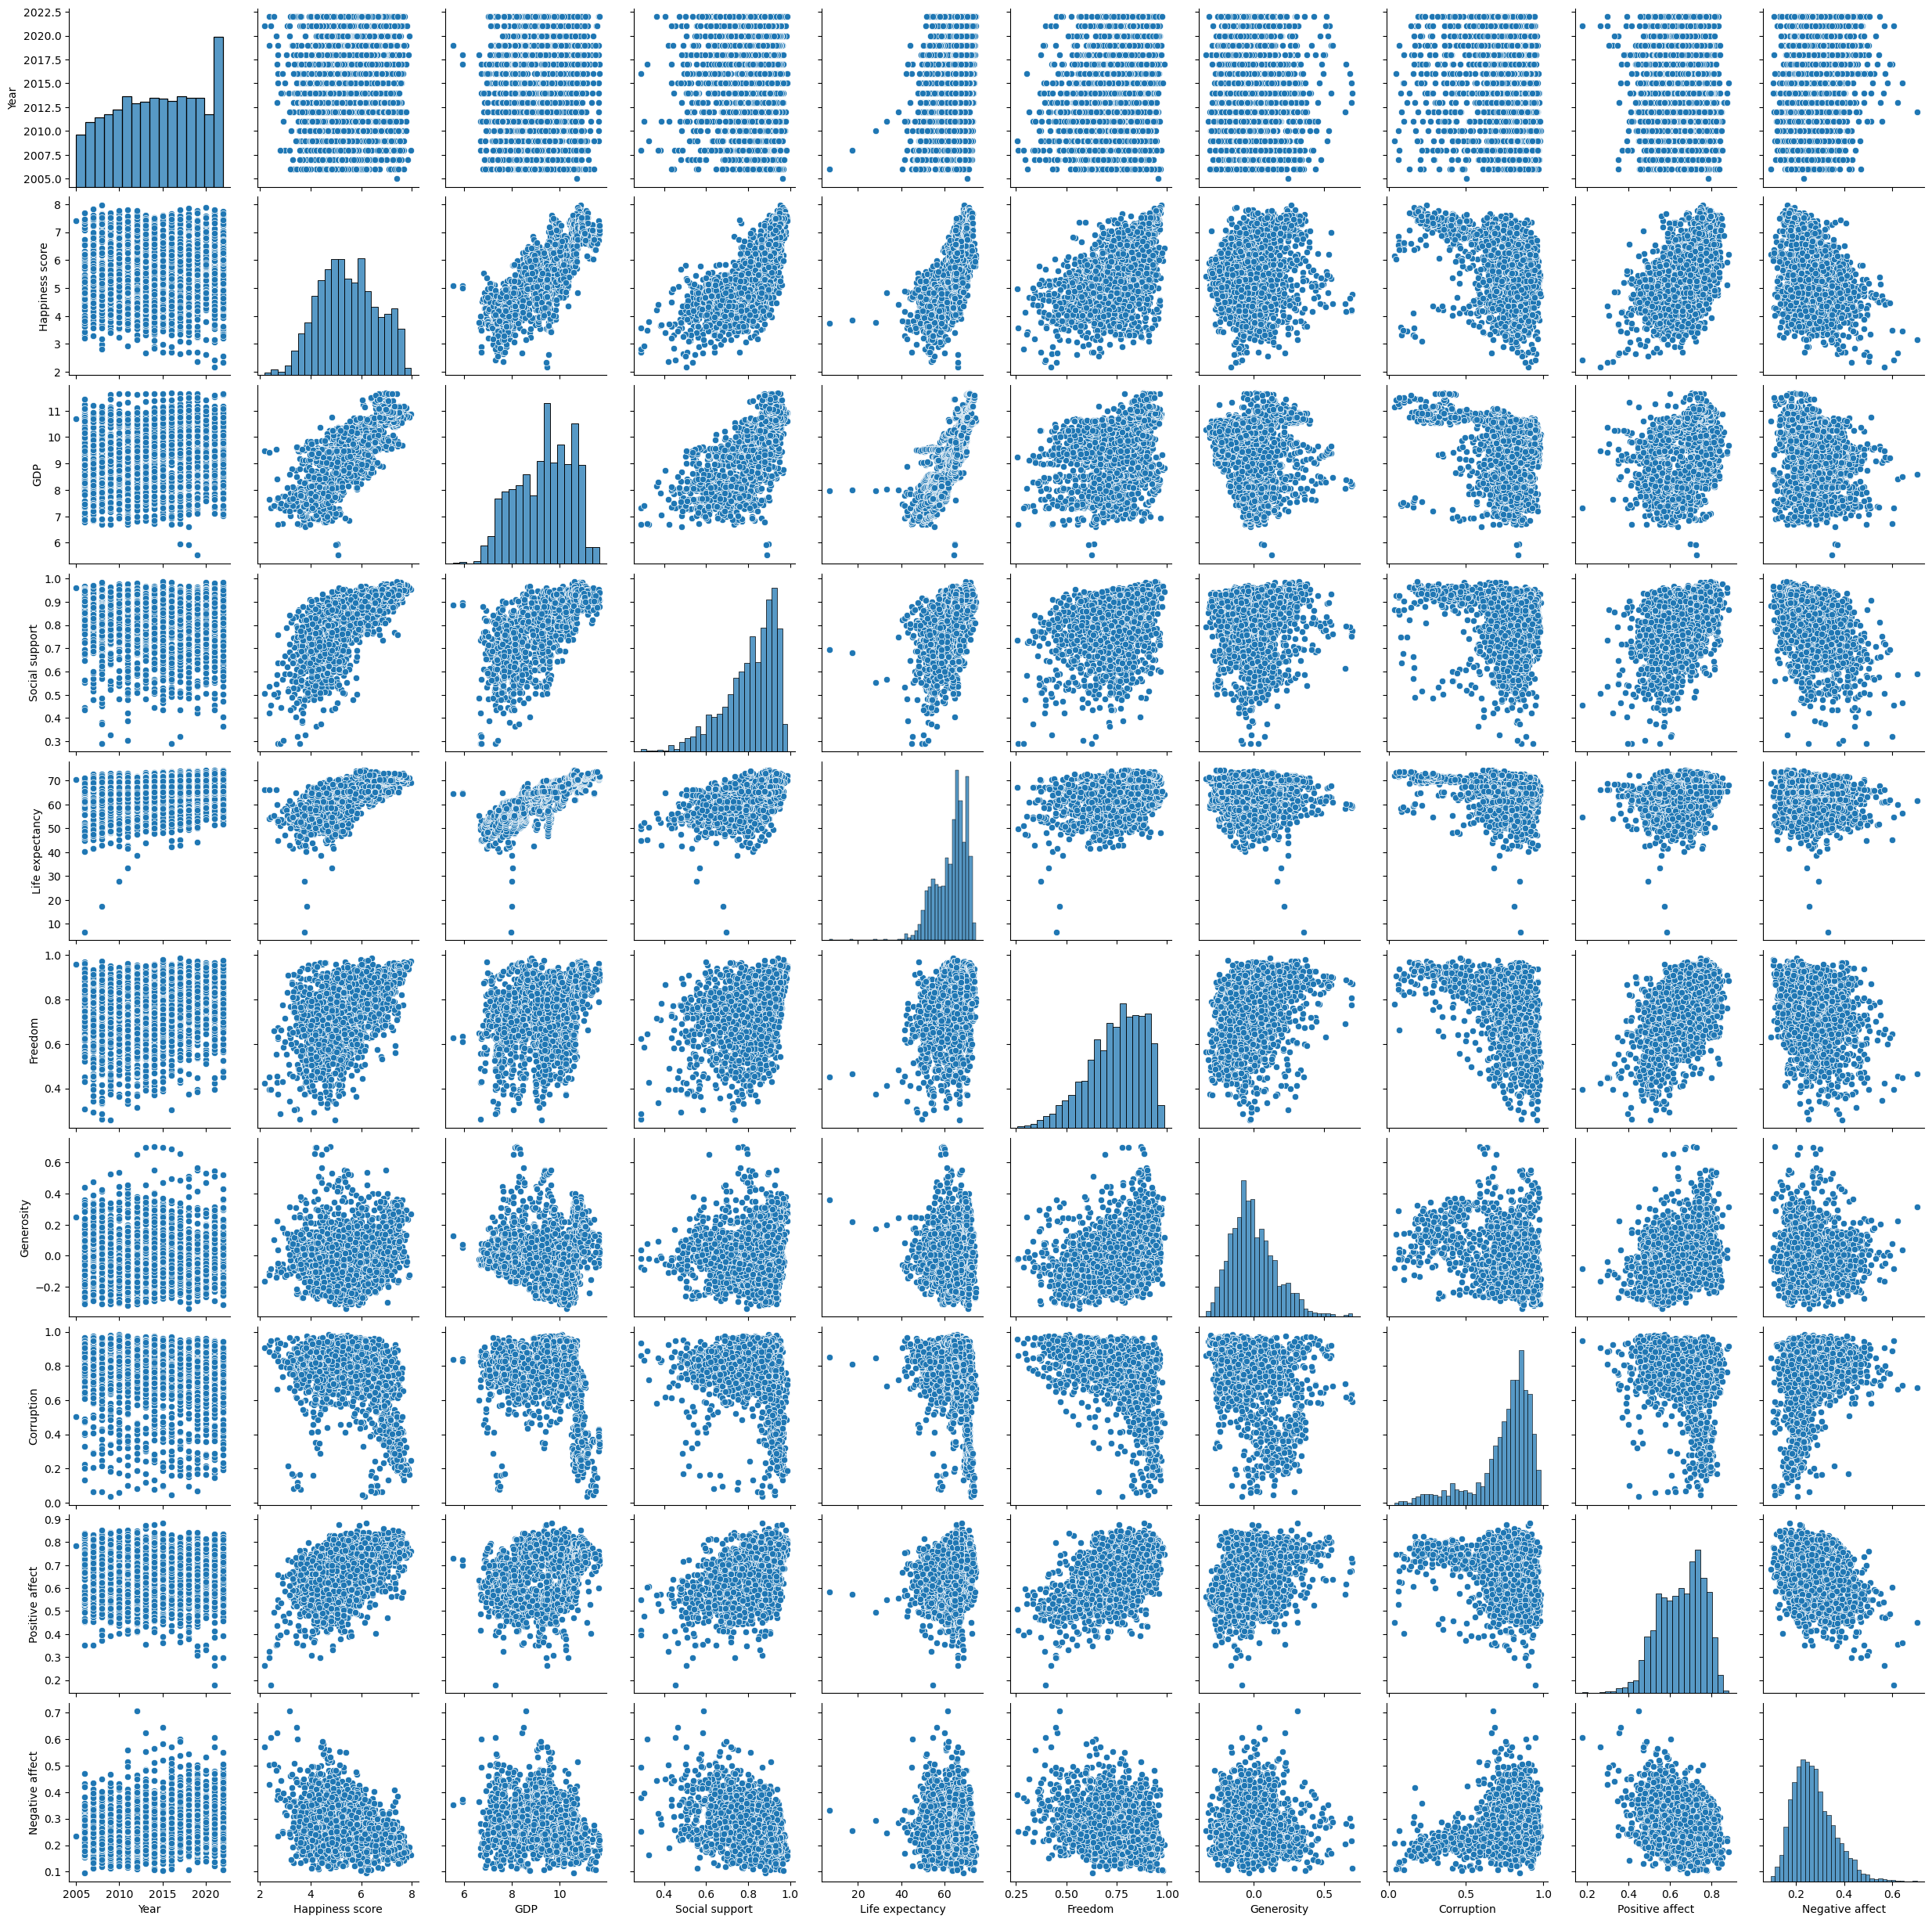

In [14]:
g = sns.pairplot(happy)

In [15]:
# It seems to be moderate posivite trend between GDP and Happiness score, Social support and happiness score and Life expectancy and happiness score.
# It seems to be interesting negative correlation between Corruption and Generosity and it would be interesting if there will be some clusters and how happiness categories looks like.

# Categorical plot

<Axes: xlabel='Happiness score', ylabel='Count'>

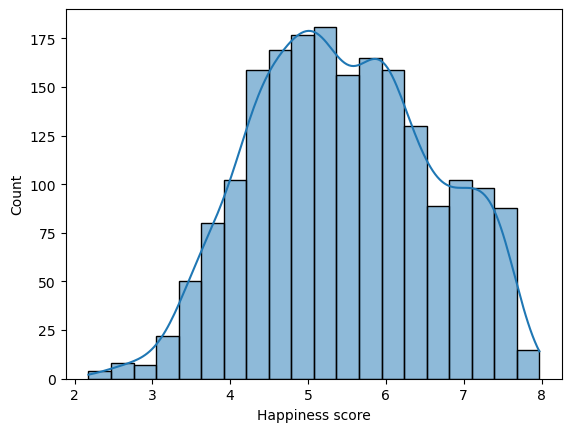

In [16]:
sns.histplot(happy['Happiness score'], bins = 20, kde = True)

In [17]:
happy.loc[happy['Happiness score'] < 4.5, 'Happiness category'] = 'Sad'

In [18]:
happy.loc[(happy['Happiness score'] >= 4.5) & (happy['Happiness score'] <6), 'Happiness category'] = 'Neutral'

In [19]:
happy.loc[happy['Happiness score'] >= 6, 'Happiness category'] = 'Happy'

In [20]:
happy['Happiness category'].value_counts(dropna = False)

Neutral    882
Happy      642
Sad        437
Name: Happiness category, dtype: int64

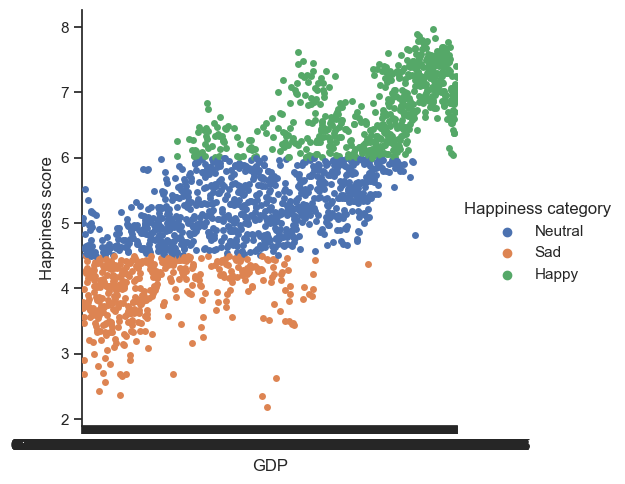

In [21]:
sns.set(style="ticks")
g = sns.catplot(x="GDP", y="Happiness score", hue="Happiness category", data=happy)


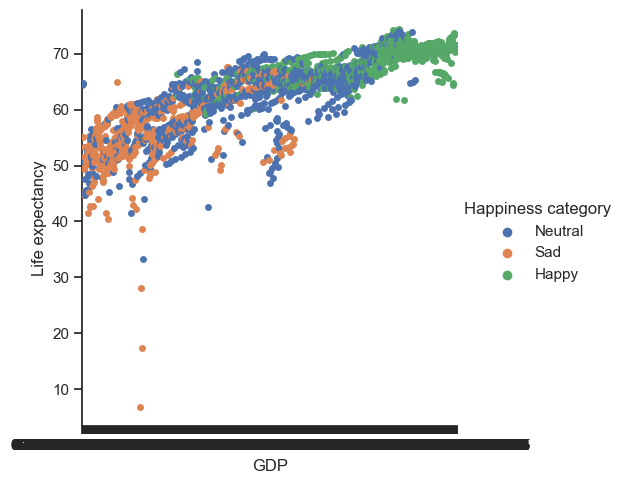

In [22]:
sns.set(style="ticks")
h = sns.catplot(x="GDP", y="Life expectancy", hue="Happiness category", data=happy)

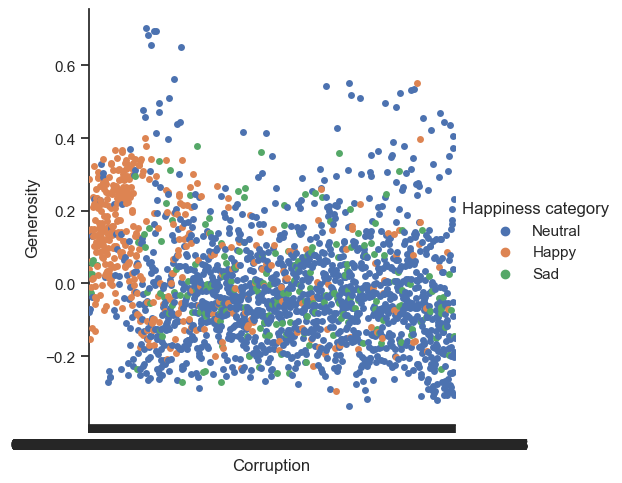

In [48]:
sns.set(style="ticks")
i = sns.catplot(x="Corruption", y="Generosity", hue="Happiness category", data=happy)

In [44]:
g.savefig("out.png") 

In [45]:
h.savefig("out.png") 

In [50]:
# Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. 
#1.	What is the most and least happy place on the world?
#2.	How consistent is the happiness score over the years?
#3.	Did COVID-19 pandemic change the happiness distribution over the world?
# Since COVID-19 affected GDP per capita and social support which both seems to affect happiness score I would assume the happiness inequalities during years 2019-2022 will be stronger than in previous years. 
#  The overal happiness score during pandemic should be lower.
# Add any new questions that may have arisen based on the early findings in your visual exploration.
# Can life expectancy and GDP factor be used to cluster different happiness categories?

In [51]:
# Define any hypotheses that you can at this point. You’ll be testing these later on.
# Since COVID-19 affected GDP per capita and social support in many places in years 2019-2022 happiness scores are lower than in the years before.
# The countries with highest happiness score before 2019 have highest happiness scores in pandemic years due to strong social support system and high GDP.